# Visualize a gmail inbox over time

Visit https://accounts.google.com/ServiceLogin?service=backup to download a copy of your gmail inbox as a .mbox file.

In [1]:
import mailbox, pandas as pd, matplotlib.pyplot as plt, matplotlib.font_manager as fm
from dateutil.parser import parse as parse_date
%matplotlib inline

In [2]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

In [3]:
# load the mbox file
path = 'gmail.mbox'
mbox = mailbox.mbox(path)
print 'There are {:,} messages in the archive.'.format(len(mbox))

There are 163,381 messages in the archive.


In [4]:
# get a list of the dates of all the messages in the mbox
all_dates = []
for message in mbox:
    # mbox contains emails and hangouts messages: hangouts messages have no Date key, so handle exception by skipping them
    try:
        date = str(parse_date(message['Date'])).split(' ')[0]
        all_dates.append(date)
    except (AttributeError, ValueError):
        pass
print 'There are {:,} messages with dates.'.format(len(all_dates))

There are 34,554 messages with dates.


In [5]:
# get the count per date
dates = pd.Series(all_dates)
counts = dates.value_counts().sort_index()

print 'There are {:,} dates with messages.'.format(len(counts))
counts.head()

There are 3,629 dates with messages.


2004-07-27    1
2004-10-27    1
2004-11-04    1
2004-11-07    1
2004-11-17    2
dtype: int64

In [6]:
# not every date has a message, so fill in missing dates in the range with zeros
index = pd.date_range(start=dates.min(), end=dates.max(), freq='D')
index = index.map(lambda x: str(x.date()))
counts = counts.reindex(index, fill_value=0)

print 'There are {:,} dates total in the range, with or without messages.'.format(len(counts))
counts.head()

There are 4,147 dates total in the range, with or without messages.


2004-07-27    1
2004-07-28    0
2004-07-29    0
2004-07-30    0
2004-07-31    0
dtype: int64

In [7]:
# create a series of labels for the plot: each new year's day
xlabels = pd.Series([x if '01-01' in x else None for x in counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels.head()

158     2005-01-01
523     2006-01-01
888     2007-01-01
1253    2008-01-01
1619    2009-01-01
dtype: object

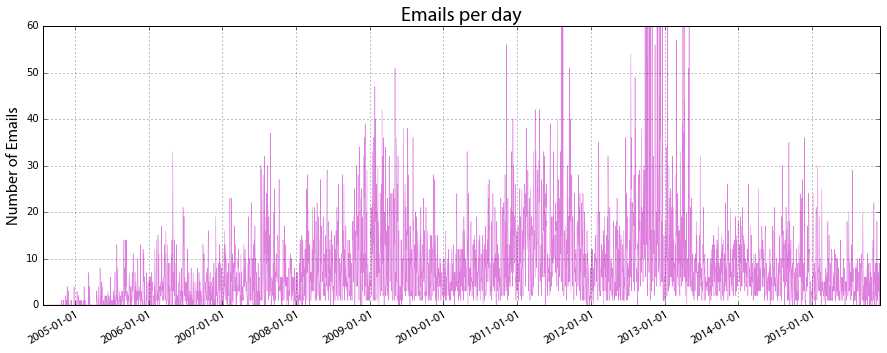

In [8]:
# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = counts.plot(kind='line', linewidth=0.5, alpha=0.5, color='m')

ax.grid(True)
ax.set_ylim([0, 60])
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=30, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of Emails', fontproperties=label_font)
ax.set_title('Emails per day', fontproperties=title_font)

plt.show()